In [1]:
# Import basic liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
! pip install tensorflow

In [12]:
# Neural network related libaraies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

In [33]:
# Load the data
X_train = pd.read_csv('X_train_no_miss.csv').drop(columns='ID', axis=1)
y_train = pd.read_csv('Y_train.csv')
X_test_initial = pd.read_csv('X_test_no_miss.csv')
test_ids = X_test_initial['ID']
X_test = X_test_initial.drop(columns='ID', axis=1)

In [40]:
X_train.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

In [5]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   35602 non-null  float64
 1   Customer_Type            35602 non-null  float64
 2   Age                      35602 non-null  float64
 3   Type_Travel              35602 non-null  float64
 4   Travel_Class             35602 non-null  int64  
 5   Travel_Distance          35602 non-null  int64  
 6   Departure_Delay_in_Mins  35602 non-null  float64
 7   Arrival_Delay_in_Mins    35602 non-null  float64
 8   Seat_Comfort             35602 non-null  float64
 9   Seat_Class               35602 non-null  int64  
 10  Arrival_Time_Convenient  35602 non-null  float64
 11  Catering                 35602 non-null  float64
 12  Platform_Location        35602 non-null  float64
 13  Onboard_Wifi_Service     35602 non-null  float64
 14  Onboard_Entertainment 

In [34]:
# Scale the features (fit on X_train and transform both X_train and X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set a random seed for NumPy and TensorFlow to ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# Define the model architecture
model = Sequential([
    Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Setup the ModelCheckpoint callback to save the best model
model_checkpoint = ModelCheckpoint(
    'best_model.keras',  # Specify .keras extension
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Train the model with validation split to monitor performance
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[model_checkpoint],  # Include the checkpoint in the callbacks
    verbose=1
)

# Load the best model saved by ModelCheckpoint
best_model = tf.keras.models.load_model('best_model.keras')

# Use the best model to make predictions on the test set
predictions = best_model.predict(X_test_scaled)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary output

Epoch 1/50
2159/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.8628 - loss: 0.3147
Epoch 1: val_accuracy improved from -inf to 0.92106, saving model to best_model.keras
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 325us/step - accuracy: 0.8657 - loss: 0.3086 - val_accuracy: 0.9211 - val_loss: 0.1950
Epoch 2/50
2222/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.9233 - loss: 0.1836
Epoch 2: val_accuracy improved from 0.92106 to 0.93018, saving model to best_model.keras
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 295us/step - accuracy: 0.9235 - loss: 0.1831 - val_accuracy: 0.9302 - val_loss: 0.1693
Epoch 3/50
2323/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.9328 - loss: 0.1599
Epoch 3: val_accuracy improved from 0.93018 to 0.93510, saving model to best_model.keras
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 284us/step - accuracy: 0.9328 - loss: 0.1599 - val_accuracy: 0.9351 - val_loss: 0.1565
Epoch 4/50
2240/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - accuracy: 0.9370 - loss: 0.1485
Epoch 4: val_

Epoch 24/50
2220/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.9575 - loss: 0.0994
Epoch 24: val_accuracy did not improve from 0.94946
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 294us/step - accuracy: 0.9575 - loss: 0.0993 - val_accuracy: 0.9486 - val_loss: 0.1259
Epoch 25/50
2243/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.9571 - loss: 0.0985
Epoch 25: val_accuracy did not improve from 0.94946
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 293us/step - accuracy: 0.9571 - loss: 0.0984 - val_accuracy: 0.9491 - val_loss: 0.1262
Epoch 26/50
2197/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.9574 - loss: 0.0978
Epoch 26: val_accuracy did not improve from 0.94946
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 299us/step - accuracy: 0.9574 - loss: 0.0977 - val_accuracy: 0.9492 - val_loss: 0.1262
Epoch 27/50
2156/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.9577 - loss: 0.0972
Epoch 27: val_accuracy did not improve from 0.94946
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 300us/step - accuracy: 0.9577 -

Epoch 49/50
2340/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - accuracy: 0.9627 - loss: 0.0859
Epoch 49: val_accuracy did not improve from 0.94946
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 280us/step - accuracy: 0.9627 - loss: 0.0859 - val_accuracy: 0.9457 - val_loss: 0.1385
Epoch 50/50
2300/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.9629 - loss: 0.0867
Epoch 50: val_accuracy did not improve from 0.94946
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 1s 284us/step - accuracy: 0.9629 - loss: 0.0867 - val_accuracy: 0.9455 - val_loss: 0.1363
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step


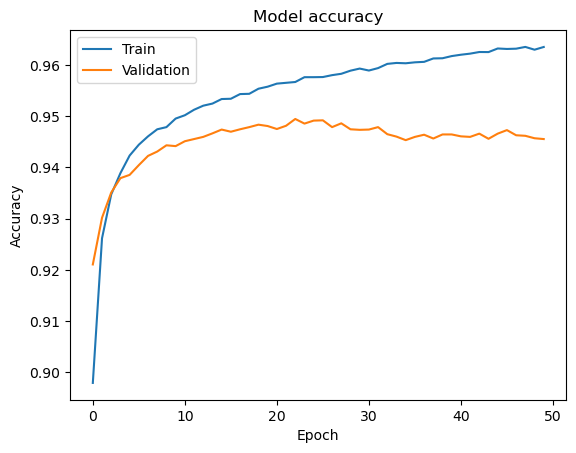

In [35]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [21]:
from sklearn.model_selection import KFold

# Set a random seed
np.random.seed(42)


# Prepare cross-validation with 5 splits, shuffling, and a specific random state
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X_train_scaled):
    X_train_k, X_val_k = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_k, y_val_k = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Build and compile the model (should be done inside the loop)
    model_val = Sequential()
    model_val.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model_val.add(Dense(32, activation='relu'))
    model_val.add(Dense(1, activation='sigmoid'))
    model_val.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    
    # Fit the model
    model_val.fit(X_train_k, y_train_k, epochs=50, batch_size=32, verbose=0)  # Adjust epochs, batch size as necessary
    
    # Evaluate the model
    score_val = model_val.evaluate(X_val_k, y_val_k, verbose=0)
    print(f'Validation score: {score_val[1]}')  # score[1] should be the accuracy if using 'metrics=['accuracy']'


Validation score: 0.9447446465492249
Validation score: 0.946651816368103
Validation score: 0.943314254283905
Validation score: 0.9461750388145447
Validation score: 0.9465960264205933


**Interpretation of Validation Scores**

- **High Accuracy Scores**: The validation scores are all above 94%, which suggests that the model is performing very well across different subsets of the training data. This is a positive sign that the model is not overly fitted to a particular part of the training data.
- **Consistency Across Folds**: The slight variation in accuracy scores between different folds indicates that the model's performance is stable across different splits of the data. This stability is crucial for confirming that the model is reliable and should perform similarly on new, similar data.
- **Model Robustness**: These results suggest that the neural network architecture, including the number of layers, nodes, and the choice of activation functions, is well-suited for this task. The use of ReLU activation in hidden layers and sigmoid in the output layer for binary classification appears to be effective.

In [41]:
# Predict the result
predictions = model.predict(X_test_scaled)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary output

# Combine IDs with predictions for a submission
results_df = pd.DataFrame({
    'ID': test_ids,
    'Overall_Experience': predictions.ravel()  # Adjust based on your model output structure
})

# Save or return results
results_df.to_csv('submisson1.csv', index=False)

1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step


In [37]:
results_df

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1
...,...,...
35597,99935598,0
35598,99935599,1
35599,99935600,0
35600,99935601,1


In [38]:
X_test_initial.shape

(35602, 24)

## Hyperparameter Tuning

In [25]:
!pip install keras-tuner

  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/db/5d/945296512980b0827e93418514c8be9236baa6f0a1e8ca8be3a2026665b0/keras_tuner-1.4.7-py3-none-any.whl.metadata
  Obtaining dependency information for kt-legacy from https://files.pythonhosted.org/packages/16/53/aca9f36da2516db008017db85a1f3cafaee0efc5fc7a25d94c909651792f/kt_legacy-1.0.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00a 0:00:01


In [27]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    
    def build(self, hp):
        model = keras.Sequential()
        model.add(layers.InputLayer(input_shape=self.input_shape))
        
        # Tune the number of layers, now allowing up to 5 dense layers
        for i in range(hp.Int('num_layers', 1, 5)): 
            model.add(layers.Dense(
                units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                activation=hp.Choice('activation_' + str(i), values=['relu', 'tanh', 'sigmoid'])
            ))
        
        model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
        
        # Compile model
        model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        return model

# Assuming X_train_scaled and y_train are already defined
input_shape = (X_train_scaled.shape[1],)

hypermodel = MyHyperModel(input_shape=input_shape)

# Initialize the tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=20,  # Set a reasonable number of trials to find the best hyperparameters
    executions_per_trial=2,
    directory='my_dir',  # Directory to store logs
    project_name='keras_tuner_demo'
)

# Start tuning
tuner.search(X_train_scaled, y_train, epochs=10, validation_split=0.2, verbose=1)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The best number of layers: {best_hps.get('num_layers')}
The best number of units per layer: {[best_hps.get('units_' + str(i)) for i in range(best_hps.get('num_layers'))]}
The best activations per layer: {[best_hps.get('activation_' + str(i)) for i in range(best_hps.get('num_layers'))]}
The best learning rate for the optimizer: {best_hps.get('learning_rate')}
""")


Trial 20 Complete [00h 00m 37s]
val_accuracy: 0.9423871636390686

Best val_accuracy So Far: 0.9486649632453918
Total elapsed time: 00h 15m 06s

The best number of layers: 4
The best number of units per layer: [480, 416, 192, 160]
The best activations per layer: ['relu', 'tanh', 'tanh', 'relu']
The best learning rate for the optimizer: 0.000589358031504996



### Optimized Model 

In [31]:
# Set a random seed for NumPy and TensorFlow to ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the optimized model architecture based on hyperparameter tuning results
model_optimized = Sequential([
    Dense(480, input_shape=(X_train_scaled.shape[1],), activation='relu'),  # First optimized layer
    Dense(416, activation='tanh'),  # Second optimized layer
    Dense(192, activation='tanh'),  # Third optimized layer
    Dense(160, activation='relu'),  # Fourth optimized layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model with the optimized learning rate
model_optimized.compile(optimizer=Adam(learning_rate=0.000589358031504996), loss='binary_crossentropy', metrics=['accuracy'])

# Setup the ModelCheckpoint callback to save the best model
model_checkpoint_optimized = ModelCheckpoint(
    'best_model_optimized.keras',  # Specify .keras extension
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Train the model with validation split to monitor performance
history_optimized = model_optimized.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,  # Consider adjusting based on performance and overfitting
    batch_size=32,  # Batch size remains as per the base setup
    callbacks=[model_checkpoint_optimized],  # Include the checkpoint in the callbacks
    verbose=1
)

# Load the best model saved by ModelCheckpoint
best_model_optimized = tf.keras.models.load_model('best_model_optimized.keras')

# Use the best model to make predictions on the test set
predictions_optimized = best_model_optimized.predict(X_test_scaled)
predictions_optimized = (predictions_optimized > 0.5).astype(int)  # Convert probabilities to binary output


Epoch 1/50
2349/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8931 - loss: 0.2475
Epoch 1: val_accuracy improved from -inf to 0.93150, saving model to best_model_optimized.keras
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8932 - loss: 0.2473 - val_accuracy: 0.9315 - val_loss: 0.1643
Epoch 2/50
2354/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9336 - loss: 0.1557
Epoch 2: val_accuracy improved from 0.93150 to 0.93961, saving model to best_model_optimized.keras
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9336 - loss: 0.1557 - val_accuracy: 0.9396 - val_loss: 0.1422
Epoch 3/50
2344/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9439 - loss: 0.1328
Epoch 3: val_accuracy improved from 0.93961 to 0.94427, saving model to best_model_optimized.keras
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9439 - loss: 0.1328 - val_accuracy: 0.9443 - val_loss: 0.1328
Epoch 4/50
2342/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9481 - loss: 0.12

Epoch 25/50
2357/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9773 - loss: 0.0514
Epoch 25: val_accuracy did not improve from 0.94962
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9773 - loss: 0.0514 - val_accuracy: 0.9465 - val_loss: 0.1839
Epoch 26/50
2337/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9782 - loss: 0.0504
Epoch 26: val_accuracy did not improve from 0.94962
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9782 - loss: 0.0503 - val_accuracy: 0.9460 - val_loss: 0.1996
Epoch 27/50
2340/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9800 - loss: 0.0464
Epoch 27: val_accuracy did not improve from 0.94962
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9800 - loss: 0.0464 - val_accuracy: 0.9440 - val_loss: 0.2109
Epoch 28/50
2339/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9803 - loss: 0.0461
Epoch 28: val_accuracy did not improve from 0.94962
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9804 - loss: 0.0461 - 

Epoch 50/50
2333/2360 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9911 - loss: 0.0229
Epoch 50: val_accuracy did not improve from 0.94962
2360/2360 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9911 - loss: 0.0229 - val_accuracy: 0.9452 - val_loss: 0.3201
1113/1113 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


In [32]:
# Combine IDs with predictions for a submission
results_df_optimized = pd.DataFrame({
    'ID': test_ids,
    'Overall_Experience': predictions_optimized.ravel()  # Adjust based on your model output structure
})

# Save or return results
results_df_optimized.to_csv('submisson2.csv', index=False)